---
title: "Datos sobre el desastre del Titanic"
date: "2025-02-14"
categories: [Colab]
image: https://colab.research.google.com/img/colab_favicon_256px.png
---

Colab

<a href="https://colab.research.google.com/github/aotal/ImagenMedica/blob/master/posts/code/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este notebook está basado en un reto planteado por Kaggle titulado [Titanic:Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview). En ese enlace teneis lo que significa cada elemento de la tabla. Nosotros simplemente nos centraremos en el pre-procesado de datos y no haremos nada de *machine learning*

No hace falta modificar el código, solamente hay que contestar a las preguntas planteadas.

Haz una copia del *colab* en tu espacio personal

Si tienes dudas *está permitido preguntar al [LLM](https://chat.openai.com/) que utilices habitualmente*.

Importar librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

Bajar los ficheros de datos

In [ ]:
gdown.download("https://drive.google.com/uc?id=1cMIDGxAwhM_U5KOPPYacLhgZB5jdJesP")
gdown.download("https://drive.google.com/uc?id=1pNBx8OWEzZEAwAH5Ge-bBu-wnlBICfrt")

Downloading...
From: https://drive.google.com/uc?id=1cMIDGxAwhM_U5KOPPYacLhgZB5jdJesP
To: /content/train.csv
100%|██████████| 61.2k/61.2k [00:00<00:00, 25.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pNBx8OWEzZEAwAH5Ge-bBu-wnlBICfrt
To: /content/test.csv
100%|██████████| 28.6k/28.6k [00:00<00:00, 31.5MB/s]


'test.csv'

Leer los datos de entrenamiento y de prueba

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Mostrar las primeras filas del conjunto de datos de entrenamiento

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Agregar una columna 'source' para indicar si los datos son de entrenamiento o de prueba

In [ ]:
train_data['source'] = 'train'
test_data['source'] = 'test'

Concatenar los conjuntos de datos de entrenamiento y de prueba

In [ ]:
total_data = pd.concat((train_data, test_data), axis=0)
total_data.reset_index(inplace=True, drop=True)

In [ ]:
# @title Q1 ¿Por qué unimos los dos conjuntos en un mismo dataframe?
Q1 = "Para que el procesamiento de los datos sea el mismo en ambos conjuntos." # @param ["_","Para reducir el tamaño de los conjuntos de datos.", "Porque es una práctica estándar en la ciencia de datos.", "Para simplificar el análisis de los datos.", "Para que el procesamiento de los datos sea el mismo en ambos conjuntos.", "Porque es más eficiente computacionalmente."]



Información sobre el conjunto de datos combinado

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


Crear una nueva característica 'HasCabin' que indica si el pasajero tiene una cabina

In [ ]:
total_data["HasCabin"] = pd.notna(total_data["Cabin"])

Eliminar la columna original 'Cabin'

In [ ]:
total_data.drop(['Cabin'], axis=1, inplace=True)

In [ ]:
# @title Q2: ¿Por qué hemos cambiado la variable Cabin por la variable HasCabin?
Q2 = "_" # @param ["_", "Porque la variable cabin era redundante.", "Para simplificar el conjunto de datos.", "Porque la variable hascabin ofrece más información relevante.", "Para mejorar la visualización de los datos.", "Porque no aporta nada saber en qué cabina iba el pasajero o si viajaba en camarote o no."]


Crear una nueva característica 'IsAlone' que indica si el pasajero viaja solo

In [ ]:
total_data['IsAlone'] = (total_data['SibSp'] + total_data['Parch'] == 0)

Manejar valores faltantes: completar con el valor más frecuente para 'Embarked'

In [ ]:
total_data["Embarked"]

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
1304,S
1305,C
1306,S
1307,S


In [ ]:
embarked_top = total_data["Embarked"].describe().top
total_data["Embarked"] = total_data["Embarked"].fillna(embarked_top)

In [ ]:
total_data["Embarked"].describe()

,Embarked
count,1309
unique,3
top,S
freq,916


In [ ]:
# @title Q3:¿Por qué se ha tomado el valor más frecuente para llenar los huecos en la columna Embarked?
Q3 = "_" # @param ["_", "Por tomar una al azar.", "Para simplificar el procesamiento de los datos.", "Porque es mucho más frecuente subir en Southampton que en las otras dos opciones.", "Para mejorar la visualización de los datos.", "Por una cuestión alfabética."]


Codificación One-Hot.

La codificación OneHot es una técnica para convertir variables categóricas en vectores binarios. Cada categoría única se representa con una columna binaria, donde un valor de 1 indica la presencia de la categoría y 0 su ausencia. Es ampliamente utilizada en el procesamiento de datos para preparar variables categóricas para su uso en algoritmos de aprendizaje automático.

In [ ]:
# Creamos una instancia de OneHotEncoder
ohe = OneHotEncoder()

# Codificación One-Hot para la variable 'Sex'
sex_column = total_data['Sex'].values.reshape(-1, 1)
sex_encoded = ohe.fit_transform(sex_column)
sex_df = pd.DataFrame(sex_encoded.toarray(), columns=ohe.get_feature_names_out())

# Codificación One-Hot para la variable 'HasCabin'
has_cabin_column = total_data['HasCabin'].values.reshape(-1, 1)
has_cabin_encoded = ohe.fit_transform(has_cabin_column)
has_cabin_df = pd.DataFrame(has_cabin_encoded.toarray(), columns=ohe.get_feature_names_out())

# Codificación One-Hot para la variable 'Embarked'
embarked_column = total_data['Embarked'].values.reshape(-1, 1)
embarked_encoded = ohe.fit_transform(embarked_column)
embarked_df = pd.DataFrame(embarked_encoded.toarray(), columns=ohe.get_feature_names_out())

In [ ]:
# @title Q4: ¿Por qué crees que se han codificado así las variables Sex, HasCabin y Embarked?
Q4 = "_" # @param ["_", "Para aumentar la complejidad de los datos.", "Porque las variables originales eran numéricas y necesitaban ser transformadas.", "Porque son variables categóricas y son más fáciles de tratar así.", "Para reducir el tamaño del conjunto de datos.", "Porque las variables originales no eran relevantes para el análisis."]


Borrar las columnas no necesarias

In [ ]:
total_data.drop(['Name', 'Ticket'], axis=1, inplace=True)

Eliminar las columnas originales después de la codificación One-Hot

In [ ]:
total_data.drop(['Sex', 'HasCabin', 'Embarked'], axis=1, inplace=True)

Concatenar las nuevas características codificadas con el conjunto de datos

In [ ]:
total_data = pd.concat([total_data, sex_df, has_cabin_df, embarked_df], axis=1)

Separar el conjunto de datos combinado en conjuntos de entrenamiento y prueba

In [ ]:
train_data_p = total_data[total_data["source"]=="train"]
test_data_p  = total_data[total_data["source"]=="test"]

Eliminar la columna 'source'

In [ ]:
train_data_p = train_data_p.drop(['source'], axis=1)  # Crear una copia del DataFrame sin la columna 'source'
test_data_p = test_data_p.drop(['source'], axis=1)  # Crear una copia del DataFrame sin la columna 'source'


Imputación de valores faltantes usando KNNImputer

Ayuda. Preguntadle a ChatGPT qué significa el código de la celda siguiente

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=8)

# learn the parameters of kNN and apply the model
# on train_data which includes target variable (Survived)
train_data_p = pd.DataFrame(imputer.fit_transform(train_data_p), columns = train_data_p.columns)

# Apply the kNN model on test_data to predict the missing Age values
test_data_p = pd.DataFrame(imputer.transform(test_data_p), columns = test_data_p.columns)

In [ ]:
# @title Q5: ¿Qué estrategia se ha seguido para llenar las edades faltantes?
Q5 = "_" # @param ["_", "Dividir el conjunto de datos en grupos basados en otras características y luego asignar una edad promedio a cada grupo.", "Utilizar técnicas de imputación basadas en la media o la mediana de las edades existentes.", "Eliminar las filas con valores de edad faltantes.", "Aplicar un promedio de las edades existentes.", "Utilizar técnicas de estimación de los valores faltantes con un algoritmo no supervisado."]


In [ ]:
test_data_p

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsAlone,x0_female,x0_male,x0_False,x0_True,x0_C,x0_Q,x0_S
891,892,NaN,3,34.5,0,0,7.8292,True,0.0,1.0,1.0,0.0,0.0,1.0,0.0
892,893,NaN,3,47.0,1,0,7.0000,False,1.0,0.0,1.0,0.0,0.0,0.0,1.0
893,894,NaN,2,62.0,0,0,9.6875,True,0.0,1.0,1.0,0.0,0.0,1.0,0.0
894,895,NaN,3,27.0,0,0,8.6625,True,0.0,1.0,1.0,0.0,0.0,0.0,1.0
895,896,NaN,3,22.0,1,1,12.2875,False,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,NaN,0,0,8.0500,True,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1305,1306,NaN,1,39.0,0,0,108.9000,True,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1306,1307,NaN,3,38.5,0,0,7.2500,True,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1307,1308,NaN,3,NaN,0,0,8.0500,True,0.0,1.0,1.0,0.0,0.0,0.0,1.0


Visualización de la correlación entre características

<Axes: >

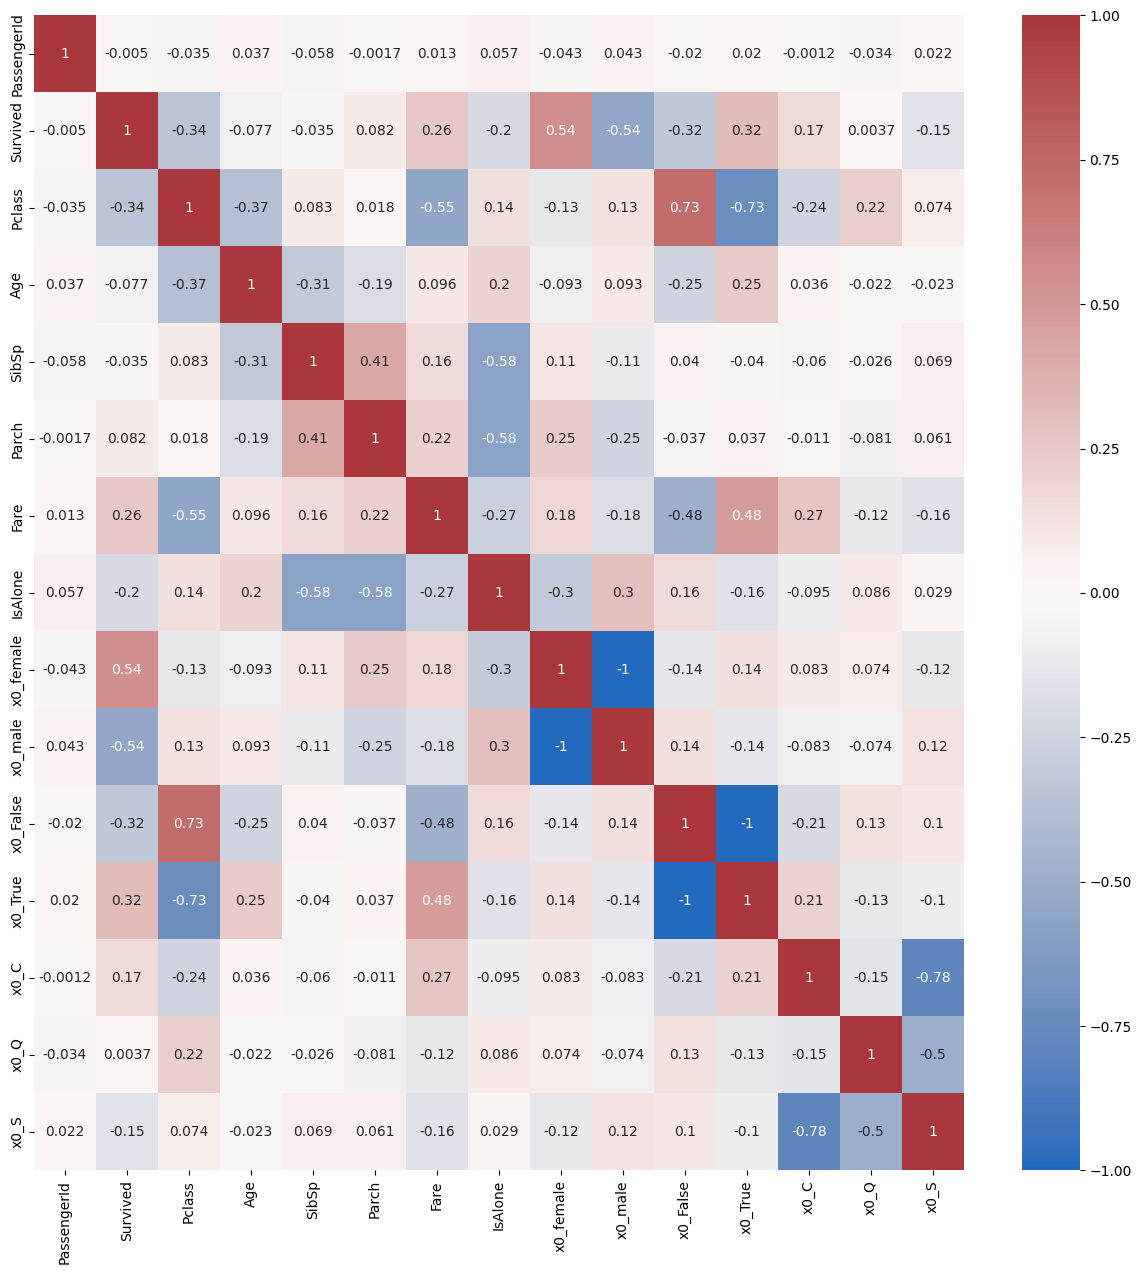

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data_p.corr(), cbar=True, cmap='vlag', vmin=-1, vmax=1, annot=True)

Calcular las tasas de supervivencia para mujeres y hombres en el conjunto de datos de entrenamiento

In [ ]:
women = train_data[train_data.Sex=="female"]["Survived"]
men = train_data[train_data.Sex=="male"]["Survived"]
survivalRateForWomen = sum(women)/len(women)
survivalRateForMen = sum(men)/len(men)
print("Tasa de supervivencia para mujeres: ", survivalRateForWomen)
print("Tasa de supervivencia para hombres: ", survivalRateForMen)

Tasa de supervivencia para mujeres:  0.7420382165605095
Tasa de supervivencia para hombres:  0.18890814558058924
